In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(22)

In [35]:
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T
X = np.concatenate((X0, X1), axis=1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis=1)

In [36]:
from cvxopt import matrix, solvers

V = np.concatenate((X0, -X1), axis=1)
K = matrix(V.T.dot(V))

p = matrix(-np.ones((2*N, 1)))

G = matrix(-np.eye(2*N))
h = matrix(np.zeros((2*N, 1)))
A = matrix(y)
b = matrix(np.zeros((1, 1)))
solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

l = np.array(sol['x'])
print('lambda = ')
print(l.T)

lambda = 
[[1.56669397e-09 6.73723141e-09 2.68650895e+00 6.29774391e-09
  1.30702792e-08 5.98483658e-09 5.09558490e-09 4.34459390e-09
  7.70373977e-09 3.96015961e-09 5.17429324e-09 2.88279044e-09
  3.87940714e-09 1.31525773e-08 6.95829441e-09 2.68650895e+00
  6.84465651e-09 2.13627060e-09 6.01299193e-09 4.74887360e-09]]


In [37]:
epsilon = 1e-6
S = np.where(l > epsilon)[0]

VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
lS = l[S]

w = VS.dot(lS)
b = np.mean(yS.T - w.T.dot(XS))

print('w = ', w.T)
print('b = ', b)

w =  [[-2.06680213  1.04945068]]
b =  3.9986482831392323


In [38]:
from sklearn.svm import SVC

yy = y.reshape((2*N,))
XX = X.T
clf = SVC(kernel='linear', C=1e5)

clf.fit(XX, yy)

w1 = clf.coef_
b1 = clf.intercept_
print('w = ', w1)
print('b = ', b1)

w =  [[-2.06680348  1.04945138]]
b =  [3.99865118]


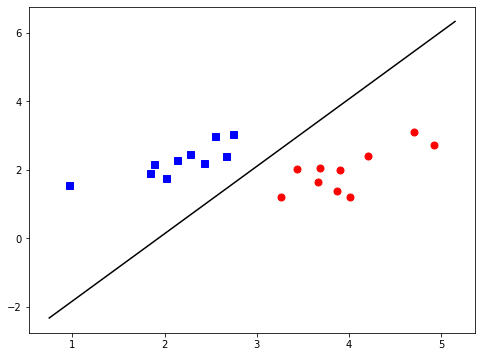

In [77]:
plt.figure(figsize=(8, 6))
plt.plot(X0[0, :], X0[1, :], 'bs', markersize=7)
plt.plot(X1[0, :], X1[1, :], 'ro', markersize=7)

xn = np.arange(0.75, 5.25, 0.1)
yn1 = -w1[0, 0]/w1[0, 1]*xn - b/w1[0, 1]
#yn2 = -w1[0, 0]/w1[0, 1]*xn - (b-1)/w1[0, 1]
#yn3 = -w1[0, 0]/w1[0, 1]*xn - (b+1)/w1[0, 1]

plt.plot(xn, yn1, 'k')
#plt.plot(xn, yn2, 'y')
#plt.plot(xn, yn3, 'y')

#plt.xlim(0.5, 5.2)
#plt.ylim(1, 3.5)
plt.show()